In [1]:
!pip install librosa


In [2]:
pip install /kaggle/input/resampywhl/resampy-0.4.3-py3-none-any.whl

Processing /kaggle/input/resampywhl/resampy-0.4.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
import resampy

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
import librosa
audio_file_path='/kaggle/input/testdata/test/fold1/100032-3-0-0.mp3'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

/tmp/ipykernel_30/3178971713.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/testdata/test/fold1/100032-3-0-0.mp3'

In [17]:
print(librosa_audio_data)

[-8.7311491e-11  0.0000000e+00  0.0000000e+00 ... -1.4848227e-02
 -1.3839809e-02 -5.5786381e-03]


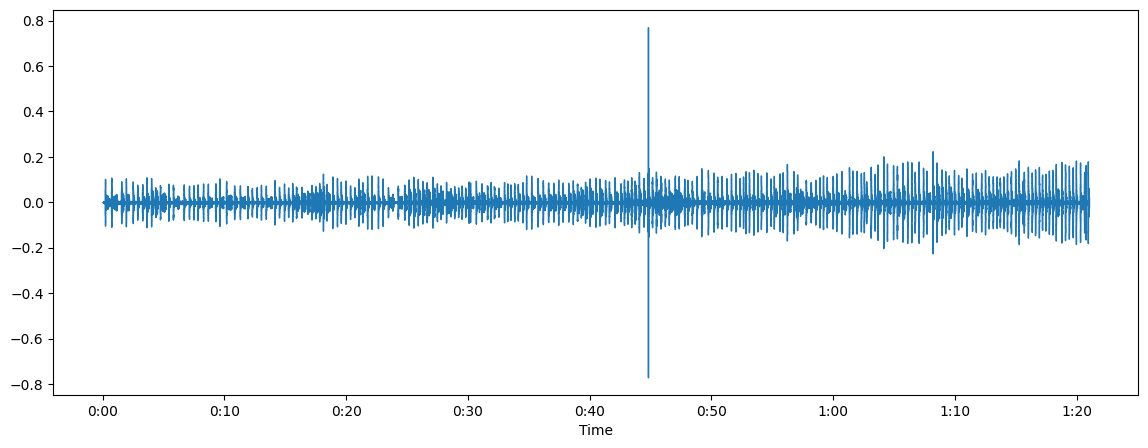

In [31]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(audio_file_path)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(audio_file_path)

In [39]:
### Lets read with scipy
from pydub import AudioSegment
from scipy.io import wavfile
import numpy as np

# Convert MP3 to WAV
audio = AudioSegment.from_mp3(audio_file_path)
wav_file_path = "temp_audio.wav"
audio.export(wav_file_path, format="wav")

# Now read the WAV file using scipy
wave_sample_rate, wave_audio = wavfile.read(wav_file_path)

# Optional: Convert to numpy array if needed
wave_audio = np.array(wave_audio)


In [40]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-349, -517],
       [-273, -360],
       [-259, -234]], dtype=int16)

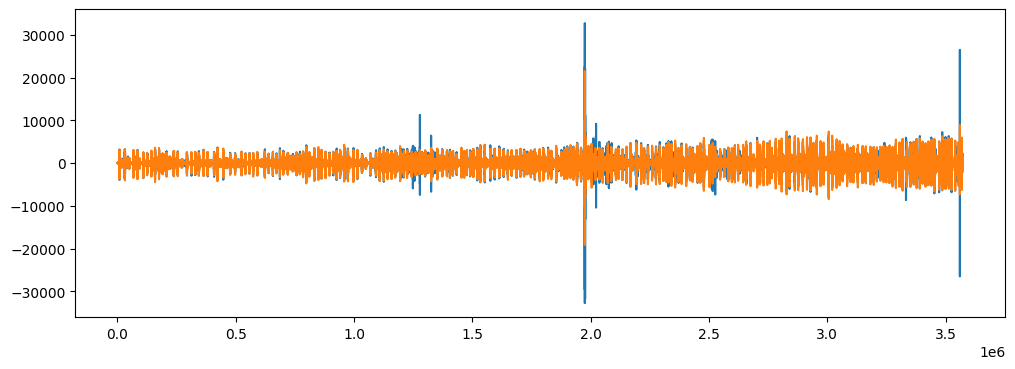

In [41]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [42]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 3490)


In [43]:
mfccs

array([[-6.7039789e+02, -5.2762622e+02, -4.8548016e+02, ...,
        -2.9020221e+02, -3.2535721e+02, -3.6599146e+02],
       [ 4.3751694e+01,  4.4377892e+01,  4.4876221e+01, ...,
         3.6867477e+01,  5.2902779e+01,  7.8282440e+01],
       [ 1.0151783e+01,  1.1679108e+01,  1.2045558e+01, ...,
        -8.9339905e+01, -7.4720825e+01, -5.5612450e+01],
       ...,
       [ 7.8102434e-01,  2.7488155e+00,  3.4143357e+00, ...,
        -4.6249928e+00, -2.9415090e+00, -3.4315388e+00],
       [-4.0678945e+00, -1.1158449e+01, -9.7080975e+00, ...,
        -7.6624660e+00, -8.9002008e+00, -5.2523422e+00],
       [ 2.0584064e+00, -6.7628898e-02, -7.2914988e-01, ...,
         2.7296844e+00,  5.2914968e+00,  4.8635406e+00]], dtype=float32)

In [49]:
import pandas as pd
import os
import librosa

audio_dataset_path='/kaggle/input/testdata/test'
metadata=pd.read_csv('/kaggle/input/testdata/test/Birds Voice.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.mp3,100032,0.0,0.317551,1,1,1,Andean Guan
1,100263-2-0-117.mp3,100263,58.5,62.500000,1,1,1,Andean Guan
2,100263-2-0-121.mp3,100263,60.5,64.500000,1,1,1,Andean Guan
3,100263-2-0-126.mp3,100263,63.0,67.000000,1,1,1,Andean Guan
4,100263-2-0-137.mp3,100263,68.5,72.500000,1,1,1,Andean Guan


In [111]:
from pydub import AudioSegment
import numpy as np
import librosa

def features_extractor(file_name):
    # Convert MP3 to WAV using pydub
    audio = AudioSegment.from_mp3(file_name)
    wav_file_path = "temp_audio.wav"
    audio.export(wav_file_path, format="wav")
    
    # Load the WAV file using librosa
    audio, sample_rate = librosa.load(wav_file_path, sr=None)
    mfccs_features = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features


In [112]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

30it [00:13,  2.26it/s]


In [113]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.00017204837, 0.0015656084, 0.003067022, 0.0...",Andean Guan
1,"[0.00017204837, 0.0015656084, 0.003067022, 0.0...",Andean Guan
2,"[0.00017204837, 0.0015656084, 0.003067022, 0.0...",Andean Guan
3,"[1.0631585e-05, 1.6350168e-05, 2.2993167e-05, ...",Andean Guan
4,"[1.0631585e-05, 1.6350168e-05, 2.2993167e-05, ...",Andean Guan


In [114]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [115]:
X.shape

(30, 128)

In [116]:
y

array(['Andean Guan', 'Andean Guan', 'Andean Guan', 'Andean Guan',
       'Andean Guan', 'Andean Guan', 'Andean Guan', 'Andean Guan',
       'Andean Guan', 'Andean Guan', 'Andean Guan', 'Andean Guan',
       'Andean Guan', 'Andean Guan', 'Andean Guan', 'Andean Guan',
       'Andean Guan', 'Andean Guan', 'Andean Guan', 'Andean Guan',
       'Andean Guan', 'Andean Guan', 'Andean Guan', 'Andean Guan',
       'Andean Guan', 'Andean Guan', 'Andean Guan', 'Andean Guan',
       'Andean Guan', 'Andean Guan'], dtype='<U11')

In [117]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [118]:
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [119]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and label arrays
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Check the number of samples
if X.shape[0] > 1:  # Ensure more than one sample is present
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
else:
    print("Not enough samples for train-test split. Proceeding without split.")
    X_train, y_train = X, y  # Use all data for training
    X_test, y_test = None, None  # Set test set to None


Shape of X: (30, 128)
Shape of y: (30, 1)


In [120]:
X_train

array([[9.18054860e-03, 5.31520275e-03, 4.16398281e-03, ...,
        3.57152312e-04, 3.50891845e-04, 1.18816664e-04],
       [7.06464471e-03, 1.07564349e-02, 1.05079757e-02, ...,
        9.69129815e-07, 4.28914700e-06, 2.40696613e-06],
       [1.12259376e+00, 1.74436718e-01, 3.74478139e-02, ...,
        8.92826879e-09, 8.49344861e-09, 8.23874391e-09],
       ...,
       [5.97540796e-01, 2.00057715e-01, 4.95989174e-02, ...,
        6.68500499e-09, 3.33484418e-09, 3.30988348e-09],
       [2.72677630e-01, 4.57601517e-01, 3.72286052e-01, ...,
        3.24678862e-09, 3.26980110e-09, 3.25150662e-09],
       [2.74731833e-02, 5.85138500e-02, 9.05583873e-02, ...,
        9.28740405e-07, 5.05615162e-07, 2.24975793e-07]], dtype=float32)

In [121]:
y


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [122]:
X_train.shape

(24, 128)

In [123]:
if X_test is not None:
    print(X_test.shape)
else:
    print("X_test is None, so no shape available.")


(6, 128)


In [124]:
y_train.shape

(24, 1)

In [125]:
if y_test is not None:
    print(y_test.shape)
else:
    print("y_test is None, so no shape available.")


(6, 1)


In [126]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [128]:
### No of classes
num_labels=y.shape[1]

In [129]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(128,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,301 (208.21 KB)

 Trainable params: 53,301 (208.21 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [132]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.00000, saving model to saved_models/audio_classification.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2: val_loss did not improve from 0.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: val_loss did not improve from 0.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: val_loss did not improve from 0.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0

In [133]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [134]:
prediction_feature = features_extractor(file_name)

# Now you can access its shape
print(prediction_feature.shape)

(128,)


In [135]:
prediction_feature.shape

(128,)

In [136]:
X_test[1]

array([9.18054860e-03, 5.31520275e-03, 4.16398281e-03, 3.89394676e-03,
       4.41652117e-03, 5.47633832e-03, 7.52879912e-03, 7.97393452e-03,
       8.70587025e-03, 1.01572992e-02, 1.16351536e-02, 1.41427889e-02,
       1.94704197e-02, 2.71952804e-02, 3.03887036e-02, 2.59667691e-02,
       2.42254920e-02, 2.15088110e-02, 2.33607441e-02, 3.36261429e-02,
       6.24412112e-02, 6.95478842e-02, 7.73401707e-02, 6.50261492e-02,
       6.75963834e-02, 8.60949159e-02, 1.12318315e-01, 1.39098555e-01,
       1.59329668e-01, 1.68208256e-01, 1.41795263e-01, 1.78977698e-01,
       2.12267831e-01, 1.72013536e-01, 1.54871613e-01, 1.72058091e-01,
       2.77303070e-01, 3.50110948e-01, 5.17078519e-01, 8.70758772e-01,
       6.57903492e-01, 5.28976858e-01, 5.17105162e-01, 7.71266818e-01,
       8.58417511e-01, 1.58726585e+00, 2.80750370e+00, 4.11300898e+00,
       4.52275181e+00, 4.96920729e+00, 3.98820186e+00, 3.32926393e+00,
       2.05844021e+00, 1.12142611e+00, 1.03898907e+00, 1.06536722e+00,
      

In [137]:
import numpy as np

# Get the predicted probabilities for each class
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels (assuming multi-class classification)
predicted_classes = np.argmax(predictions, axis=1)

# Now 'predicted_classes' contains the predicted class labels for each instance in X_test
print(predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[0 0 0 0 0 0]


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (6, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [138]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
# Assuming mfccs_scaled_features is your extracted features
mfccs_scaled_features = features_extractor(file_name)

# Ensure it has the correct shape for prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)  # Reshape to (1, 128) for a single sample

predicted_probs = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probs, axis=-1)


In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder

# Assuming 'model' and 'labelencoder' are already defined and trained

# Load the audio file without resampling
filename = "/kaggle/input/red-birdy-test/test/fold4/101382-2-0-29.mp3"
audio, sample_rate = librosa.load(filename, sr=None)  # Set sr=None to avoid resampling

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)  # Ensure n_mfcc is set to 128
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Print MFCC features shape
print("MFCC Features Shape:", mfccs_scaled_features.shape)

# Reshape for prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)  # Reshape to (1, 128) for a single sample

# Predict the class
predicted_probs = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probs, axis=-1)

# Inverse transform the predicted label to get the class name
prediction_class = labelencoder.inverse_transform(predicted_label)
print("Predicted Class:", prediction_class)
